In [1]:
from sklearn import svm
import csv
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

food_file_path, non_food_file_path = 'food.csv', 'no_food.csv'
# food_file_path2, non_food_file_path2 = 'food2.csv', 'no_food2.csv'
food_raw_data, non_food_raw_data = [], []
# food_raw_data2, non_food_raw_data2 = [], []

train_raw_food, train_raw_non_food = [], []
test_raw_food, test_raw_non_food = [], []

train_vector_x, train_vector_y, train_vector_num = [], [], []
test_vector_x, test_vector_y = [], []

useful_tag_list, useful_dict = [], {}

correlation_dict = {}

p_food = 0


def get_raw_data():
    global food_raw_data, non_food_raw_data
       
    with open(food_file_path) as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            food_raw_data.append(row)
                
    with open(non_food_file_path) as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            non_food_raw_data.append(row)



def get_raw_data_seperate(test_total = False):
    global train_raw_food,train_raw_non_food,\
        test_raw_food, test_raw_non_food

    with open("train_food.csv") as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            train_raw_food.append(row)
    with open("train_non_food.csv") as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            train_raw_non_food.append(row)
    with open("test_food.csv") as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            test_raw_food.append(row)
    if test_total is True:
        with open("test_non_food_total.csv") as f:
            csv_reader = csv.reader(f)
            for row in csv_reader:
                test_raw_non_food.append(row)
    else:
        with open("test_non_food.csv") as f:
            csv_reader = csv.reader(f)
            for row in csv_reader:
                test_raw_non_food.append(row)


    for i in range(len(train_raw_food)):
        train_raw_food[i] = train_raw_food[i][1:]
    for i in range(len(train_raw_non_food)):
        train_raw_non_food[i] = train_raw_non_food[i][1:]
    for i in range(len(test_raw_food)):
        test_raw_food[i] = test_raw_food[i][1:]
    for i in range(len(test_raw_non_food)):
        test_raw_non_food[i] = test_raw_non_food[i][1:]
    # with open(food_file_path2) as f:
    #     csv_reader = csv.reader(f)
    #     for row in csv_reader:
    #         food_raw_data2.append(row)
    # with open(non_food_file_path2) as f:
    #     csv_reader = csv.reader(f)
    #     for row in csv_reader:
    #         non_food_raw_data2.append(row)


def shuffle_raw_data():
    global food_raw_data, non_food_raw_data
    # non_food_raw_data = non_food_raw_data[:15000]
    # non_food_raw_data = non_food_raw_data[:len(food_raw_data)]
    food_raw_data = shuffle(food_raw_data)
    non_food_raw_data = shuffle(non_food_raw_data)
    # non_food_raw_data = non_food_raw_data[:15000]
    non_food_raw_data = non_food_raw_data[:len(food_raw_data)]
    # non_food_raw_data = non_food_raw_data[00000]

    

def div_train_test_raw_data(ratio=0.75):
    global food_raw_data, non_food_raw_data, train_raw_food, \
        train_raw_non_food, test_raw_food, test_raw_non_food, \
        food_raw_data2, non_food_raw_data2
    # remove some non_food_raw_data
    # non_food_raw_data = non_food_raw_data[:10000]
    train_food_len = int(len(food_raw_data) * ratio)
    train_non_food_len = int(len(non_food_raw_data) * ratio)
    train_raw_food = food_raw_data[0:train_food_len]
    train_raw_non_food = non_food_raw_data[0:train_non_food_len]
    test_raw_food = food_raw_data[train_food_len:]
    test_raw_non_food = non_food_raw_data[train_non_food_len:]

    # train_raw_food = food_raw_data
    # test_raw_food = food_raw_data2

    # train_raw_non_food = non_food_raw_data
    # test_raw_non_food = non_food_raw_data2

def save_raw_data_train_test():
    global food_raw_data, non_food_raw_data, train_raw_food, \
        train_raw_non_food, test_raw_food, test_raw_non_food
    with open('train_food.csv', 'w') as f:
        write = csv.writer(f)
        write.writerows(train_raw_food)
    with open('train_non_food.csv', 'w') as f:
        write = csv.writer(f)
        write.writerows(train_raw_non_food )

    with open('test_food.csv', 'w') as f:
        write = csv.writer(f)
        write.writerows(test_raw_food )
    with open('test_non_food.csv', 'w') as f:
        write = csv.writer(f)
        write.writerows(test_raw_non_food)

    for i in range(len(train_raw_food)):
        train_raw_food[i] = train_raw_food[i][1:]
    for i in range(len(train_raw_non_food)):
        train_raw_non_food[i] = train_raw_non_food[i][1:]
    for i in range(len(test_raw_food)):
        test_raw_food[i] = test_raw_food[i][1:]
    for i in range(len(test_raw_non_food)):
        test_raw_non_food[i] = test_raw_non_food[i][1:]

    


def count_dict(raw_data, threshold=0.5):
    counter_dict = {}  # only collect from train data
    for i in raw_data:
        for j in range(0, len(i) - 1, 2):
            tmp = str(i[j]).strip()
            if float(i[j + 1]) > threshold:
                if tmp not in counter_dict:
                    counter_dict[tmp] = 1
                else:
                    counter_dict[tmp] += 1
            else:
                # if tmp not in counter_dict:
                #     counter_dict[tmp] = 0
                pass
    return counter_dict


def get_use_tag(use_all=False, threshold=0.5):
    global useful_tag_list, food_raw_data, non_food_raw_data, useful_dict
    useful_tag_list, useful_dict = [], {}
    food_tag_dict = count_dict(train_raw_food)
    non_food_tag_dict = count_dict(train_raw_non_food)

    if use_all:
        for i in non_food_tag_dict.keys():
            if i not in food_tag_dict.keys():
                food_tag_dict[i] = non_food_tag_dict[i]
            else:
                food_tag_dict[i] += non_food_tag_dict[i]
        # food_tag_dict.update(non_food_tag_dict)

    appear_times = 0
    appear_list = []
    for i in food_tag_dict.keys():
        appear_times += food_tag_dict[i]
        appear_list.append(food_tag_dict[i])
    appear_list.sort(reverse=True)
    useful_bound = int(appear_times * threshold)
    bound = 0
    pre_sum = 0
    for i in range(len(appear_list)):
        pre_sum += appear_list[i]
        if pre_sum > useful_bound:
            bound = appear_list[i]
            break
    for i in food_tag_dict.keys():
        if food_tag_dict[i] > bound:
            useful_tag_list.append(i)
    counter = 0
    for i in useful_tag_list:
        useful_dict[i] = counter
        counter += 1


def get_correlation():
    global train_raw_food, correlation_dict
    food_tag_dict = count_dict(train_raw_food)
    merged_dict = count_dict(train_raw_non_food)

    for i in food_tag_dict.keys():
        if i not in merged_dict.keys():
            merged_dict[i] = food_tag_dict[i]
        else:
            merged_dict[i] += food_tag_dict[i]

    for i in food_tag_dict.keys():
        if i not in correlation_dict.keys():
            # correlation_dict[i] = food_tag_dict[i] / len(food_raw_data)
            correlation_dict[i] = food_tag_dict[i] / len(train_raw_food)
            # correlation_dict[i] = food_tag_dict[i] / merged_dict[i]
        else:
            print("error in get correlation function")


def construct_train_test_set():
    global train_raw_food, train_raw_non_food, test_raw_food, \
        test_raw_non_food, train_vector_x, train_vector_y, \
        test_vector_x, test_vector_y, train_vector_num
    train_vector_x, train_vector_y, train_vector_num = [], [], []
    test_vector_x, test_vector_y = [], []
    vector_x = []
    vector_y = []
    for i in train_raw_food:
        tmp = [0 for i in range(len(useful_tag_list))]
        for j in range(0, len(i) - 1, 2):
            if i[j] in useful_dict.keys():
                tmp[useful_dict[i[j]]] = float(
                    i[j + 1]) * correlation_dict[i[j]] + p_food * (1 - float(i[j + 1]))
            else:
                # TODO: should be changed to random probability
                pass
        vector_x.append(tmp)
        vector_y.append("food")
        train_vector_num.append(1)

    for i in train_raw_non_food:
        tmp = [0 for i in range(len(useful_tag_list))]
        for j in range(0, len(i) - 1, 2):
            if i[j] in useful_dict.keys():
                tmp[useful_dict[i[j]]] = float(
                    i[j + 1]) * correlation_dict[i[j]] + p_food * (1 - float(i[j + 1]))
            else:
                # TODO: should be changed to random probability
                pass
        vector_x.append(tmp)
        vector_y.append("no food")
        train_vector_num.append(-1)

    train_vector_x, train_vector_y = vector_x, vector_y

    vector_x, vector_y = [], []

    for i in test_raw_food:
        tmp = [0 for i in range(len(useful_tag_list))]
        for j in range(0, len(i) - 1, 2):
            if i[j] in useful_dict.keys():
                tmp[useful_dict[i[j]]] = float(
                    i[j + 1]) * correlation_dict[i[j]] + p_food * (1 - float(i[j + 1]))
            else:
                # TODO: should be changed to random probability
                pass
        vector_x.append(tmp)
        vector_y.append("food")

    for i in test_raw_non_food:
        tmp = [0 for i in range(len(useful_tag_list))]
        for j in range(0, len(i) - 1, 2):
            if i[j] in useful_dict.keys():
                tmp[useful_dict[i[j]]] = float(
                    i[j + 1]) * correlation_dict[i[j]] + p_food * (1 - float(i[j + 1]))
            else:
                # TODO: should be changed to random probability
                pass
        vector_x.append(tmp)
        vector_y.append("no food")
    test_vector_x, test_vector_y = vector_x, vector_y


def confision_matrix(ground_true, predict, print_result=False):
    TP, FP, FN, TN = 0, 0, 0, 0
    for i in range(len(ground_true)):
        if ground_true[i] == "food" and predict[i] == "food":
            TP += 1
        elif ground_true[i] == "no food" and predict[i] == "food":
            FP += 1
        elif ground_true[i] == "food" and predict[i] == "no food":
            FN += 1
        elif ground_true[i] == "no food" and predict[i] == "no food":
            TN += 1
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    if TP + FP != 0:
        PPV = TP/(TP + FP) # precision
    else:
        PPV = 0
    if print_result:
        print("TP: ", TP, "FN: ", FN, "TN: ", TN, "FP :", FP)
        print(TP, " ", FN, " ", TN, " ", FP)
        print("Sensitivity = ", TP/(TP+FN), end="   ")
        print("Specificity = ", TN/(TN+FP), "burden: ", (TP + FP) / (TP+TN+FN+FP) )
    # print("Precision = ", TP/(TP+FP), end="   ")
    # print("Accuracy = ", (TP + TN)/(TP+TN+FN+FP))
    return TPR, FPR, PPV


def clarifai_result():
    global test_raw_food, test_raw_non_food
    TPR_list = []
    FPR_list = []
    for k in range(10):
        TP, FP, FN, TN = 0, 0, 0, 0
        ratio = k / 10
        # print(ratio)
        for i in test_raw_food:
            have = False
            for j in range(len(i)):
                if i[j] == "food" and float(i[j + 1]) > ratio:
                    have = True
            if not have:
                FN += 1
            else:
                TP += 1

        for i in test_raw_non_food:
            have = False
            for j in range(len(i)):
                if i[j] == "food" and float(i[j + 1]) > ratio:
                    have = True
            if not have:
                TN += 1
            else:
                FP += 1

        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        TPR_list.append(TPR)
        FPR_list.append(FPR)
        #if k == 9 or k == 8 or k == 7 or k ==6:
        if k == 7 or k == 6 or k == 5 or k == 4:
#             plt.scatter([FPR], [TPR], marker='o', c='green')
            print("TP: ", TP, "FN: ", FN, "TN: ", TN, "FP :", FP, "Sensitivity: ",TP / (TP + FN),"Specificity: ",TN / (TN + FP),"burden: ", (TP + FP) / (TP+TN+FN+FP)  )
            print(TP, ", ", FN, ", ", TN, ", ", FP)
            
        # print("TRP :", TPR)
        # print("FPR :", FPR)
    return TPR_list, FPR_list
        #
    #     print("clarify result**********")
    #     print("TP: ", TP, "FN: ", FN, "TN: ", TN, "FP :", FP)
    #     print("Sensitivity = ", TP / (TP + FN), end="   ")
    #     print("Specificity = ", TN / (TN + FP))
    #     print("Precision = ", TP / (TP + FP), end="   ")
    #     print("Accuracy = ", (TP + TN) / (TP + TN + FN + FP))
    #     print("burden = ", (TP + FP) / (TP +TN+FN+FP))
    # plt.scatter([1 - 0.789866667, 1 - 0.684, 1 - 0.55786, 1-0.4512], [0.584493042, 0.666003976, 0.753479125, 0.833664679], marker='o', c='green')


def get_p_food_before_balance():
    # food_num_ori = 0
    # with open("#food_ori.csv") as f:
    #     csv_reader = csv.reader(f)
    #     for row in csv_reader:
    #         food_num_ori += 1

    # no_food_num_ori = 0
    # with open("#no food_ori.csv") as f:
    #     csv_reader = csv.reader(f)
    #     for row in csv_reader:
    #         no_food_num_ori += 1
    # p_food = food_num_ori / no_food_num_ori
    # return p_food
    # p_food = len(train_raw_food) / (len(train_raw_food) + len(train_raw_non_food))
    # return p_food
    pass


def init(use_all=True):
    global p_food, train_raw_food, train_raw_non_food
    get_raw_data()
    shuffle_raw_data()
    div_train_test_raw_data(0.75)
    save_raw_data_train_test()
    clarifai_result()
    p_food = len(train_raw_food) / (len(train_raw_food) + len(train_raw_non_food))
    get_correlation()
    get_use_tag(use_all)
    construct_train_test_set()



In [2]:
# init training data testing data and required parameter

# p_food, train_raw_food, train_raw_non_food
# get_raw_data()
# shuffle_raw_data()
# div_train_test_raw_data(0.75)
# save_raw_data_train_test()

get_raw_data_seperate(test_total = False)
print(len(train_raw_food))

TPR_list, FPR_list = clarifai_result()
p_food = len(train_raw_food) / (len(train_raw_food) + len(train_raw_non_food))
get_correlation()
get_use_tag(use_all = True)
construct_train_test_set()
print('init done')

6182
TP:  1756 FN:  305 TN:  6491 FP : 6310 Sensitivity:  0.8520135856380397 Specificity:  0.5070697601749863 burden:  0.5427264163638811
1756 ,  305 ,  6491 ,  6310
TP:  1630 FN:  431 TN:  7929 FP : 4872 Sensitivity:  0.7908782144590005 Specificity:  0.6194047340051558 burden:  0.4374915892881173
1630 ,  431 ,  7929 ,  4872
TP:  1474 FN:  587 TN:  9281 FP : 3520 Sensitivity:  0.7151868025230471 Specificity:  0.7250214826966643 burden:  0.33602476113578256
1474 ,  587 ,  9281 ,  3520
TP:  1296 FN:  765 TN:  10400 FP : 2401 Sensitivity:  0.62882096069869 Specificity:  0.812436528396219 burden:  0.24875521464136724
1296 ,  765 ,  10400 ,  2401
init done


In [3]:
clf = svm.SVC(kernel='poly') # order = 3(default)
clf.fit(train_vector_x, train_vector_y)
print('trainning svm kernel done')

trainning svm kernel done


In [4]:
### svm training dataset report
svm_predict = clf.predict(train_vector_x)
print(classification_report(train_vector_y, svm_predict))
confision_matrix(train_vector_y, svm_predict, print_result=True)

              precision    recall  f1-score   support

        food       0.90      0.92      0.91      6182
     no food       0.91      0.90      0.90      6182

    accuracy                           0.91     12364
   macro avg       0.91      0.91      0.91     12364
weighted avg       0.91      0.91      0.91     12364

TP:  5663 FN:  519 TN:  5534 FP : 648
5663   519   5534   648
Sensitivity =  0.9160465868650922   Specificity =  0.8951795535425429 burden:  0.5104335166612747


(0.9160465868650922, 0.10482044645745714, 0.8973221359530977)

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
print('***********************testing set report ********************************')
svm_predict = clf.predict(test_vector_x)
TPR, FPR, PPV = confision_matrix(test_vector_y, svm_predict, print_result=True)

***********************testing set report ********************************
TP:  1750 FN:  311 TN:  10545 FP : 2256
1750   311   10545   2256
Sensitivity =  0.849102377486657   Specificity =  0.8237637684555894 burden:  0.26954649441528733


In [6]:
# get FP and FN
# print(test_vector_y)
print(svm_predict)
print(len(test_raw_food))
print(len(test_raw_non_food))
print(test_vector_y[2060])
print(test_vector_y[2061])

FN = []
FP = []
for i in range(len(svm_predict)):
    if svm_predict[i] != test_vector_y[i]:
        if i < 2061:
            FN.append(i)
        else:
            FP.append(i-len(test_raw_food))
# print(FN)
# print(FP)
test_raw_food, test_raw_non_food = [], []
with open("test_food.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        test_raw_food.append(row)

with open("test_non_food.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        test_raw_non_food.append(row)
with open("FN.txt", 'w') as f:
    for i in FN:
        f.write(test_raw_food[i][0]+"\n")
with open("./FP.txt", 'w') as f:
    for i in FP:
        f.write(test_raw_non_food[i][0]+"\n")
print("done")


['food' 'food' 'food' ... 'no food' 'no food' 'no food']
2061
12801
food
no food
done


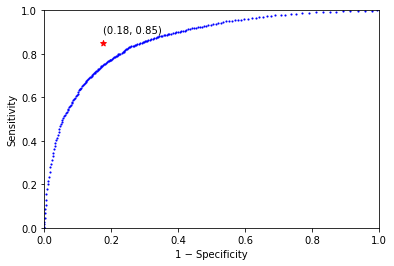

In [14]:
##%

# linera discriminant analysis
vector_x_np = np.array(train_vector_x)
vector_y_np = np.array(train_vector_num)


lda = LinearDiscriminantAnalysis().fit(vector_x_np, vector_y_np)
predict_y_prob = lda.predict_proba(test_vector_x)
predict_y = lda.predict(test_vector_x)

lda = LinearDiscriminantAnalysis().fit(vector_x_np, vector_y_np)
predict_y_prob = lda.predict_proba(test_vector_x)
predict_y = lda.predict(test_vector_x)
# print(predict_y_prob)
# print(predict_y)
TPR_logistic, FPR_logistic = [], []
step = 200
for threshold in range(0,step):
    predict_y_str = []
    for i in predict_y_prob:
        if i[0] >= threshold/step:
            predict_y_str.append("no food")
        else:
            predict_y_str.append("food")
    TPR_tmp, FPR_tmp, PPV_tmp = confision_matrix(test_vector_y, predict_y_str, print_result=False)
    # TPR_logistic.append(PPV_tmp)
    # FPR_logistic.append(TPR_tmp)
    TPR_logistic.append(TPR_tmp)
    FPR_logistic.append(FPR_tmp)
TPR_jia = [0.984958758, 0.899563319, 0.712760796, 0.463367297]
FPR_jia = [0.988125928, 0.930864776, 0.785094914, 0.573783298]
plt.scatter(FPR_logistic,TPR_logistic,marker='.',c='blue', s=5)
# plt.scatter(FPR_jia, TPR_jia, marker='.', c='#E68600')
plt.scatter([FPR], [TPR], marker='*', c='red')
# plt.scatter([TPR], [PPV], marker='*', c='red')
plt.text(FPR, TPR+0.05, '({:.2f}, {:.2f})'.format(FPR, TPR))
# plt.scatter(FPR_list, TPR_list, marker='.', c='green', s=0.5)
plt.xlabel('1 − Specificity')
plt.ylabel('Sensitivity')

# plt.scatter([FPR], [TPR], marker='*', c='red')
# plt.scatter(FPR_list[4:8], TPR_list[4:8], marker='.', c='green')
# plt.plot([0, 1], [0, 1], linestyle='--', color='magenta')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [8]:
#######################################
# this block is for logistic regreesion
#######################################
# reg = LogisticRegression(max_iter=300).fit(vector_x_np, vector_y_np)
# predict_y_prob = reg.predict_proba(test_vector_x)
# predict_y = reg.predict(test_vector_x)
# TPR_logistic, FPR_logistic = [], []
# step = 200
# for threshold in range(0,step):
#     predict_y_str = []
#     for i in predict_y_prob:
#         if i[0] >= threshold/step:
#             predict_y_str.append("no food")
#         else:
#             predict_y_str.append("food")
#     TPR_tmp, FPR_tmp = confision_matrix(test_vector_y, predict_y_str, print_result=False)
#     TPR_logistic.append(TPR_tmp)
#     FPR_logistic.append(FPR_tmp)

# plt.scatter(FPR_logistic,TPR_logistic,marker='.',c='blue')

# plt.scatter([FPR], [TPR], marker='*', c='red')
# plt.scatter(FPR_list, TPR_list, marker='.', c='green', s=0.005)

# plt.plot([0, 1], [0, 1], linestyle='--', color='magenta')
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.show()
